In [1]:
!pip install -q -U torch_harmonics neuraloperator

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from data_generator import generate_potential_data
from utilities import train, validate_model
from structs import TrainInput, ValidationInput, TrainResult, ValidationResult, ErrorType, PlotType, Configuration, DataConfiguration

In [3]:
import accelerate
import torch.nn as nn
import torch.optim as optim
from neuralop.models import FNO

accelerator = accelerate.Accelerator()
device = accelerator.device

## Parameters

In [4]:
# Create optimizer and loss function
loss_fn = nn.MSELoss()

In [5]:
loss_fn, generate_potential_data = accelerator.prepare(loss_fn, generate_potential_data)

## Train Harmonic Test Anharmonic

In [6]:
val_potentials, val_eigen_vals = generate_potential_data(
    num_samples=10,
    dx=0.1,
    dy=0.1,
    max_x_extent=3,
    max_y_extent=3,
    potential_type="anharmonic",
    device=device
)

In [7]:
train_results_1 = TrainResult.load_from_file("train_result_1.pth")

### Training Loss

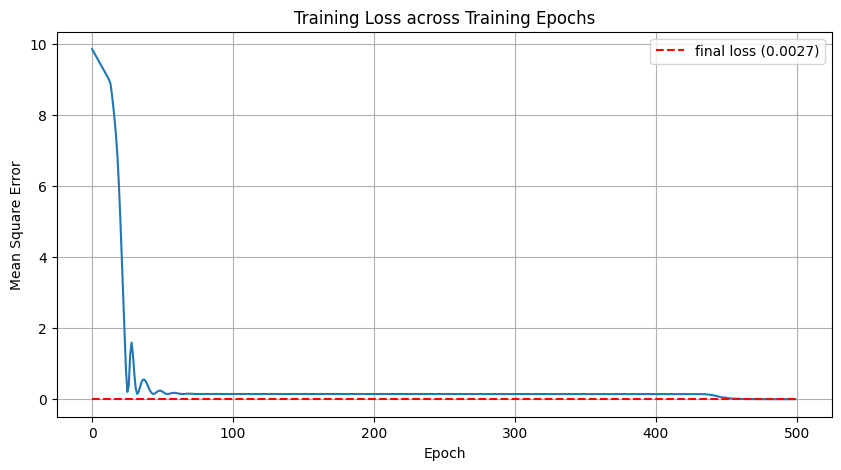

In [8]:
train_results_1.plot_losses()

In [9]:
validation_results_1 = validate_model(
    ValidationInput(
        val_potentials=val_potentials,
        val_eigen_vals=val_eigen_vals,
        model=train_results_1.model,
        loss_fn=loss_fn,
    )
)

Validation Loss: 0.032804


### Validation Errors

In [10]:
validation_results_1.errors()

ValidationErrors(MRE=0.062168218195438385, MSE=0.03517204150557518, MAE=0.14344748854637146, R2=tensor(0.9925))

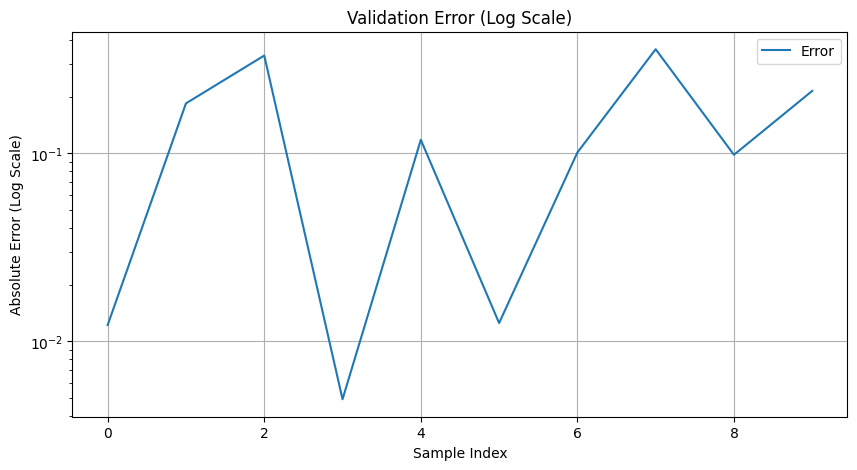

In [11]:
validation_results_1.plot(error_type=ErrorType.ABSOLUTE)

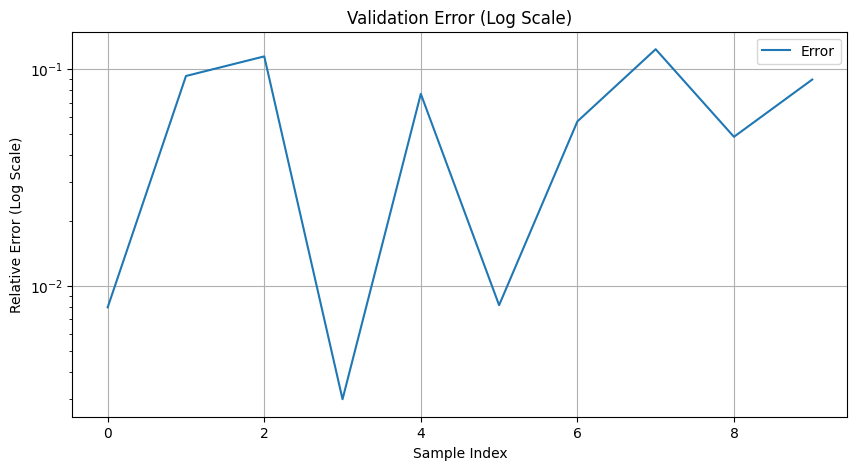

In [12]:
validation_results_1.plot(error_type=ErrorType.RELATIVE)

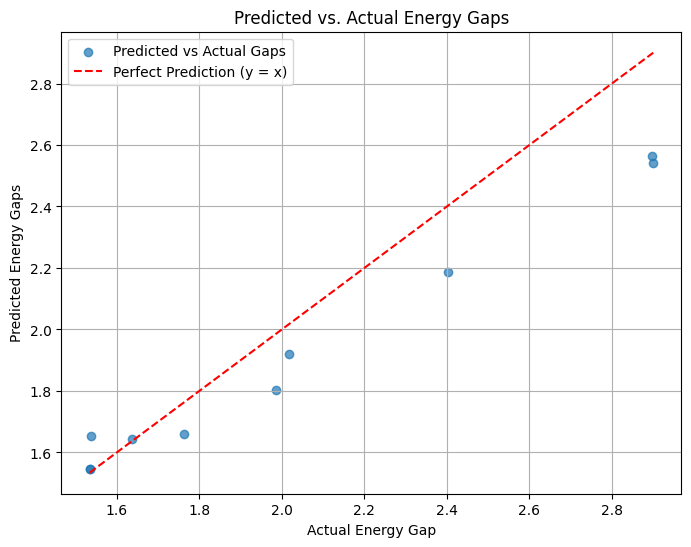

In [13]:
validation_results_1.visualize_energy_gap(plot_type=PlotType.SCATTER)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


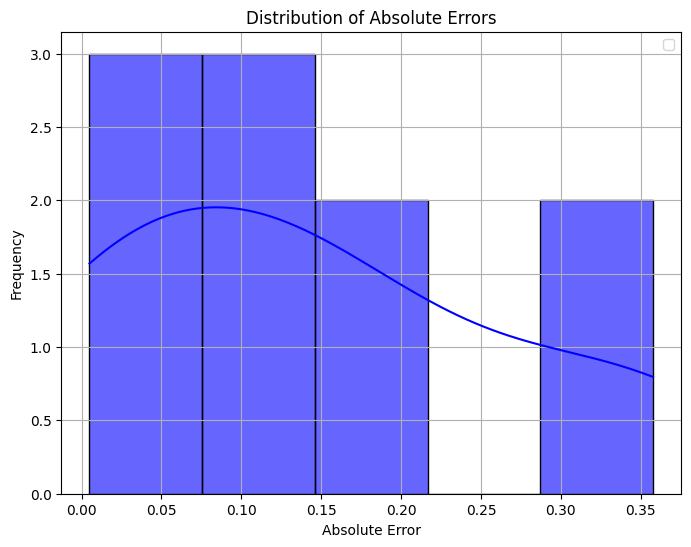

In [14]:
validation_results_1.visualize_energy_gap(plot_type=PlotType.HISTOGRAM)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


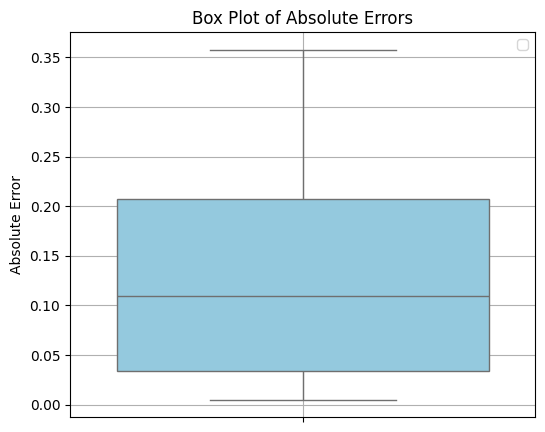

In [15]:
validation_results_1.visualize_energy_gap(plot_type=PlotType.BOX)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


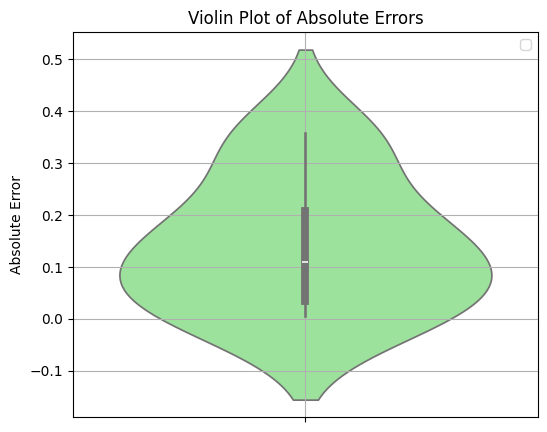

In [16]:
validation_results_1.visualize_energy_gap(plot_type=PlotType.VIOLIN)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


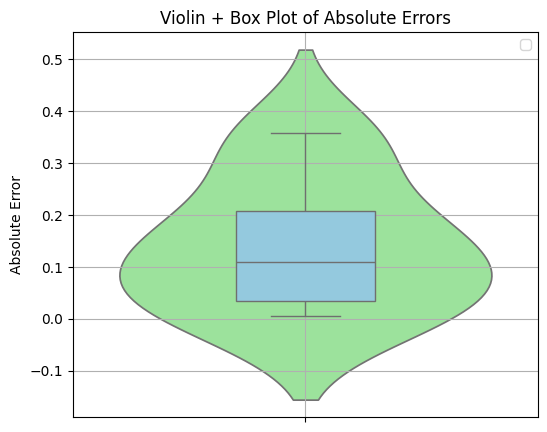

In [17]:
validation_results_1.visualize_energy_gap(plot_type=PlotType.BOX_ON_VIOLIN)

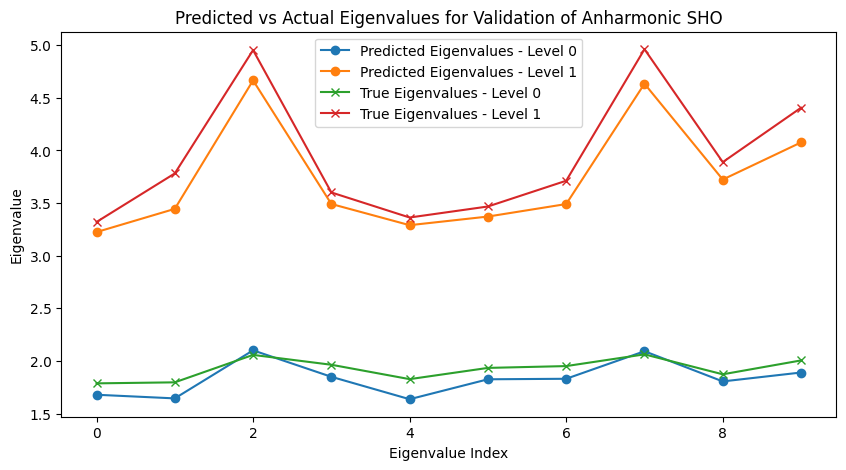

In [18]:
validation_results_1.plot_eigen_values(title="Predicted vs Actual Eigenvalues for Validation of Anharmonic SHO")

## ROUND TWO - Train Joint Test Anharmonic

In [19]:
import torch

In [20]:
# Hyperparameters
num_samples = 500
grid_size = 30
num_eigenvalues = 2
learning_rate = 1e-3
num_epochs = 500

In [21]:
# Prepare loss function
loss_fn = nn.MSELoss()
loss_fn = accelerator.prepare(loss_fn)

In [22]:
train_results_2 = TrainResult.load_from_file("train_result_2.pth")

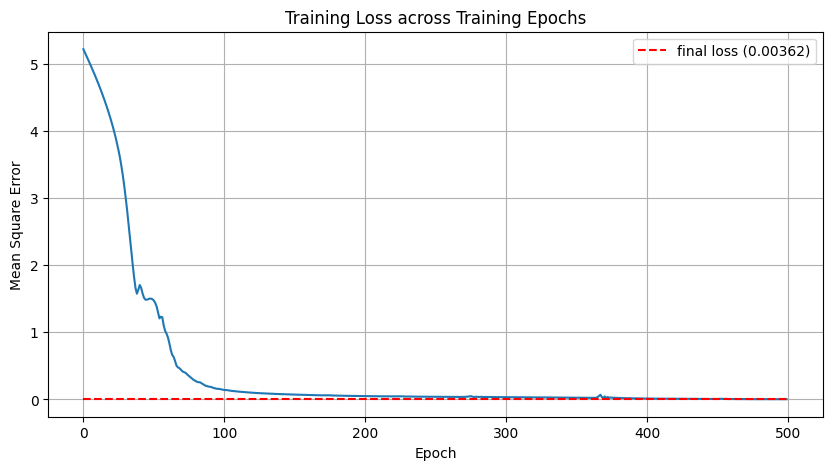

In [23]:
train_results_2.plot_losses()

### Validation

In [24]:
validation_results_2 = validate_model(
    ValidationInput(
        val_potentials=val_potentials,
        val_eigen_vals=val_eigen_vals,
        model=train_results_2.model,
        loss_fn=loss_fn,
    )
)

Validation Loss: 0.036707


### Validation Errors

In [25]:
validation_results_2.errors()

ValidationErrors(MRE=0.10196860134601593, MSE=0.06413064152002335, MAE=0.21545977890491486, R2=tensor(0.9781))

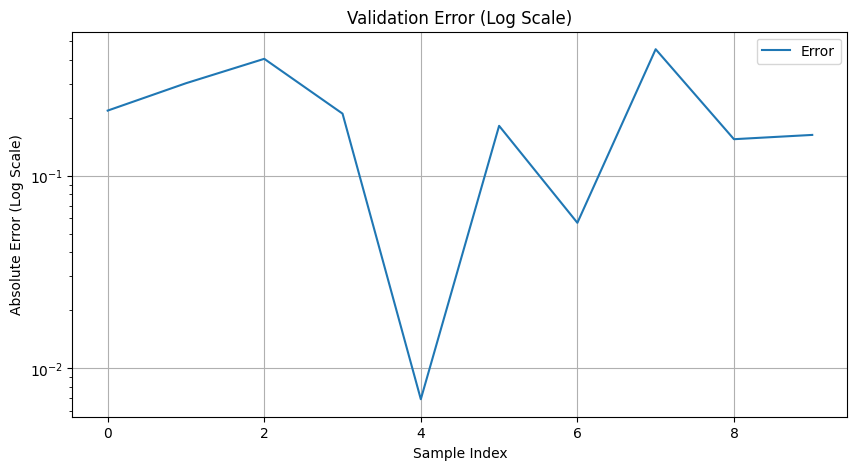

In [26]:
validation_results_2.plot(error_type=ErrorType.ABSOLUTE)

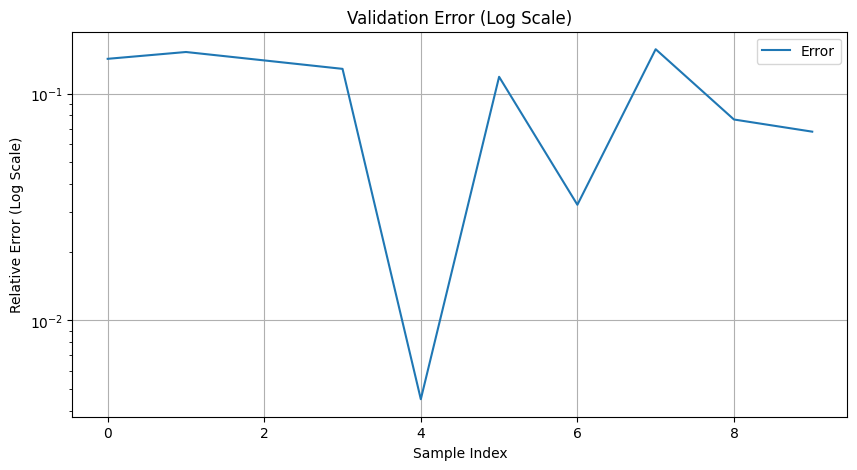

In [27]:
validation_results_2.plot(error_type=ErrorType.RELATIVE)

### Validation Plots

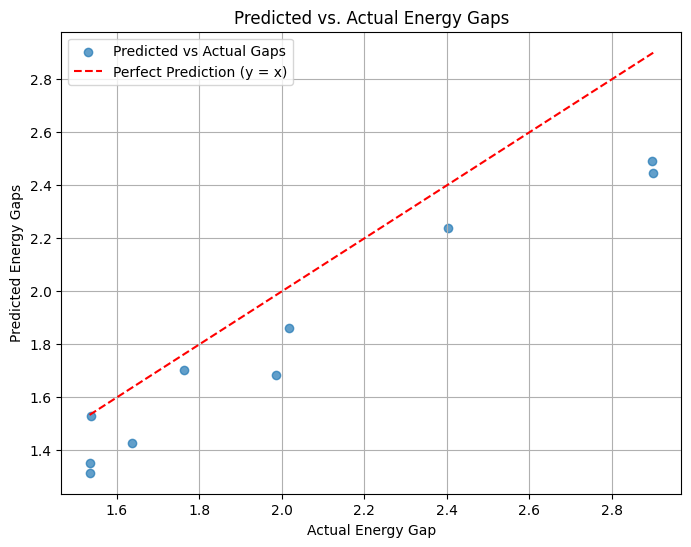

In [28]:
validation_results_2.visualize_energy_gap(plot_type=PlotType.SCATTER)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


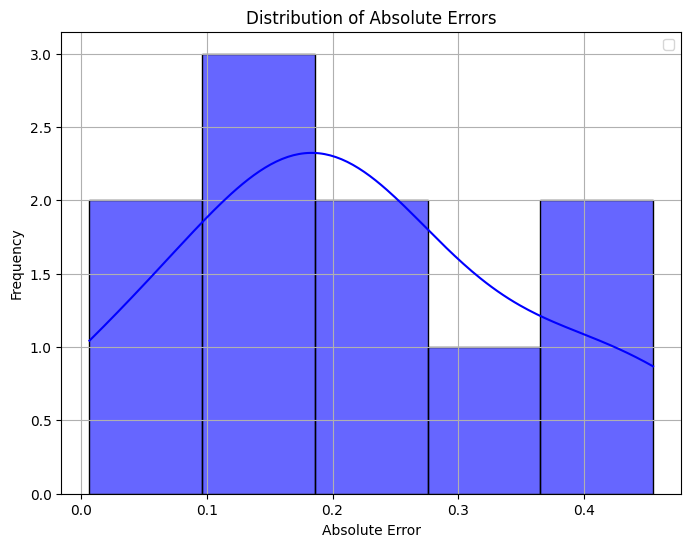

In [29]:
validation_results_2.visualize_energy_gap(plot_type=PlotType.HISTOGRAM)

/content/structs.py:351: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


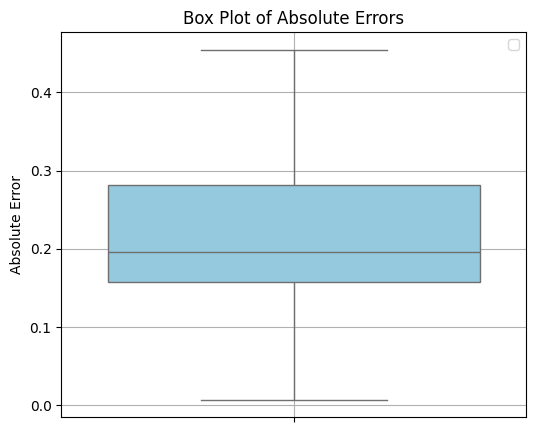

In [30]:
validation_results_2.visualize_energy_gap(plot_type=PlotType.BOX)

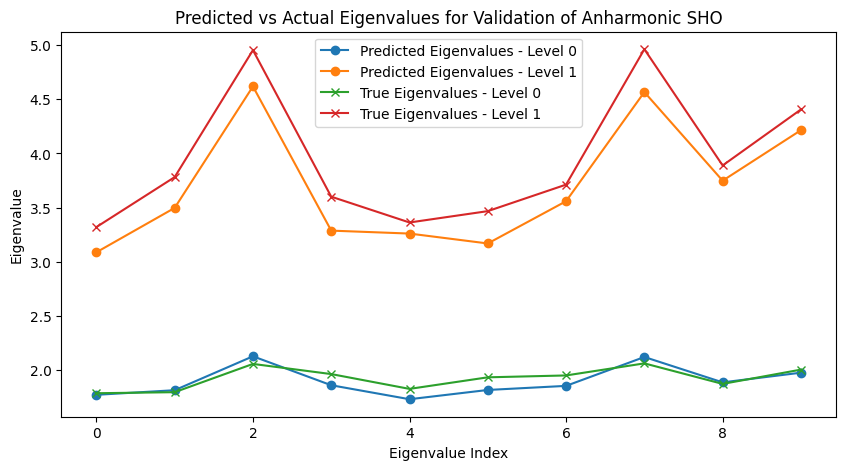

In [31]:
validation_results_2.plot_eigen_values(title="Predicted vs Actual Eigenvalues for Validation of Anharmonic SHO")